<a href="https://colab.research.google.com/github/kaushikpichumani/Titanic-Dataset-Prediciton/blob/main/01_predicting_survival_titanic_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [81]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [82]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [83]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [84]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan

data['cabin'] = data['cabin'].apply(get_first_cabin)

In [85]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

data['title'] = data['name'].apply(get_title)

In [86]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [87]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [88]:
# save the data set

data.to_csv('titanic.csv', index=False)

In [89]:
data.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
cabin        object
embarked     object
title        object
dtype: object

## Data Exploration

### Find numerical and categorical variables

In [90]:
target = 'survived'

In [91]:
vars_num = [i for i in data.columns if data[i].dtype!="object"]# fill your code here

vars_cat = [i for i in data.columns if data[i].dtype =="object"]# fill your code here

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 6
Number of categorical variables: 4


### Find missing values in variables

In [92]:
# first in numerical variables
#for i in vars_num:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
data[vars_with_na].isnull().mean().sort_values(ascending=False)

cabin       0.774637
age         0.200917
embarked    0.001528
fare        0.000764
dtype: float64

In [93]:
# now in categorical variables

cat_na = [var for var in vars_cat if var in vars_with_na]
num_na = [var for var in vars_num if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  2
Number of numerical variables with na:  2


In [94]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


<Axes: xlabel='survived'>

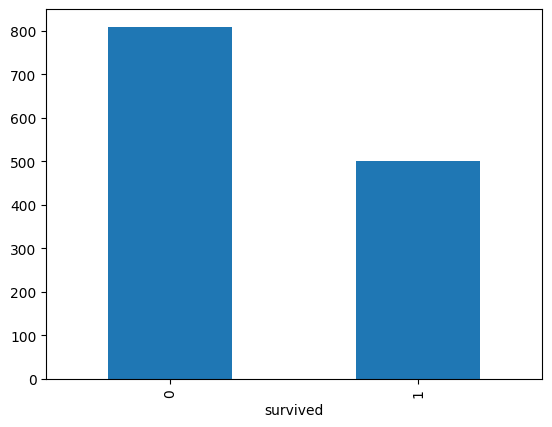

In [95]:
data["survived"].value_counts().plot(kind='bar')

### Determine cardinality of categorical variables

<Axes: >

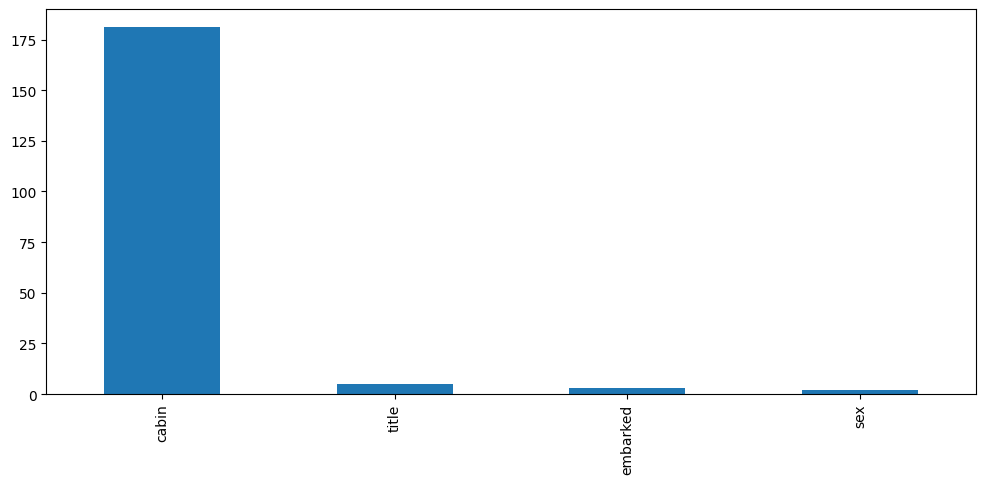

In [96]:
data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

### Determine the distribution of numerical variables

In [97]:
var_num = data.select_dtypes('number').columns.to_list()
var_num.remove("survived")

In [98]:
var_num

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [99]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

cabin       0.774637
age         0.200917
embarked    0.001528
fare        0.000764
dtype: float64

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set/
    random_state=0
    )  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

In [101]:
X_train.cabin.str[1:]

1118    NaN
44       40
1072    NaN
1130    NaN
574     NaN
       ... 
763     NaN
835     NaN
1216    NaN
559     NaN
684     NaN
Name: cabin, Length: 1047, dtype: object

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [102]:
X_train.cabin = X_train.cabin.str[1:]
X_test.cabin = X_test.cabin.str[1:]
X_test.head(100)


,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1139,3,male,38.0,0,0,7.8958,NaN,S,Mr
533,2,female,21.0,0,1,21.0000,NaN,S,Miss
459,2,male,42.0,1,0,27.0000,NaN,S,Mr
1150,3,male,NaN,0,0,14.5000,NaN,S,Mr
393,2,male,25.0,0,0,31.5000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...
142,1,male,46.0,0,0,79.2000,82,C,Mr
1236,3,male,14.0,0,0,9.2250,NaN,S,Mr
1028,3,female,NaN,1,0,24.1500,NaN,Q,Miss
420,2,male,21.0,1,0,11.5000,NaN,S,Mr


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [103]:
#X_train = X_train[~vars_cat].apply(pd.to_numeric, errors='coerce')
X_train[var_num] = X_train[var_num].fillna(X_train[var_num].median())
X_test[var_num] = X_test[var_num].fillna(X_test[var_num].median())
#X_test[~vars_cat] = X_test[~vars_cat].apply(pd.to_numeric, errors='coerce')
#X_test = X_test.fillna(X_test.median())

In [104]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1139,3,male,38.0,0,0,7.8958,NaN,S,Mr
533,2,female,21.0,0,1,21.0000,NaN,S,Miss
459,2,male,42.0,1,0,27.0000,NaN,S,Mr
1150,3,male,26.0,0,0,14.5000,NaN,S,Mr
393,2,male,25.0,0,0,31.5000,NaN,S,Mr


### Replace Missing data in categorical variables with the string **Missing**

In [105]:
#data[data.columns] = data[data.columns].apply(pd.to_numeric, errors='coerce')
X_train[vars_cat] = X_train[vars_cat].fillna("Missing")
X_test[vars_cat] = X_test[vars_cat].fillna("Missing")
#data = data.fillna(data.median())

In [106]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1139,3,male,38.0,0,0,7.8958,Missing,S,Mr
533,2,female,21.0,0,1,21.0000,Missing,S,Miss
459,2,male,42.0,1,0,27.0000,Missing,S,Mr
1150,3,male,26.0,0,0,14.5000,Missing,S,Mr
393,2,male,25.0,0,0,31.5000,Missing,S,Mr


In [107]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['survived'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in vars_cat:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: survived, dtype: float64)

cabin
A10    0.000764
A11    0.000764
A14    0.000764
A16    0.000764
A18    0.000764
         ...   
F33    0.003056
F38    0.000764
F4     0.003056
G6     0.003820
T      0.000764
Name: survived, Length: 181, dtype: float64

Series([], Name: survived, dtype: float64)

Series([], Name: survived, dtype: float64)



In [108]:
!pip install feature-engine

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [109]:
from feature_engine.encoding import (
    RareLabelEncoder,
    OneHotEncoder
)
from feature_engine.encoding import RareLabelEncoder

rare_encoder = RareLabelEncoder(
    tol=0.05,      # labels with frequencies < 'tol' will be grouped
    n_categories=1,      # minimum categories required for encoding
    variables = vars_cat) # categorical features list
rare_encoder.fit(X_train)
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_test)


In [112]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1118,3,male,25.0000,0,0,7.9250,Missing,S,Mr
44,1,female,41.0000,0,0,134.5000,40,C,Miss
1072,3,male,28.0000,0,0,7.7333,Missing,Q,Mr
1130,3,female,18.0000,0,0,7.7750,Missing,S,Miss
574,2,male,29.0000,1,0,21.0000,Missing,S,Mr
...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,Missing,S,Miss
835,3,male,28.0000,0,0,8.0500,Missing,S,Mr
1216,3,female,28.0000,0,0,7.7333,Missing,Q,Miss
559,2,female,20.0000,0,0,36.7500,Missing,S,Miss


In [119]:
X_train.cabin.unique()

array(['Missing', '40', '', '19', '32', '79', '62', '8', '28', '45', '46',
       '22', '57', '23', '44', '39', '58', '2', '47', '101', '21', '7',
       '52', '38', '36', '68', '24', '50', '111', '6', '87', '93', '125',
       '35', '73', '26', '18', '96', '78', '9', '33', '128', '69', '121',
       '123', '94', '34', '43', '31', '5', '17', '29', '11', '51', '60',
       '30', '71', '37', '55', '89', '124', '126', '49', '82', '92', '65',
       '25', '3', '91', '102', '61', '20', '77', '148', '105', '86',
       '132', '14', '54', '4', '83', '42', '56', '116', '95', '15', '10',
       '130', '67', '110', '103', '90', '118', '97', '41', '85', '63',
       '99', '16', '80'], dtype=object)

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [120]:
from feature_engine.encoding import OneHotEncoder
cat_features = vars_cat
ohe_encoder = OneHotEncoder(variables=cat_features)
ohe_encoder.fit(train_t)
ohe_train_t = ohe_encoder.transform(train_t)
ohe_test_t = ohe_encoder.transform(test_t)

In [121]:
ohe_train_t.shape, ohe_test_t.shape


((1047, 17), (262, 17))

In [122]:
ohe_train_t

,pclass,age,sibsp,parch,fare,sex_male,sex_female,cabin_Missing,cabin_Rare,embarked_S,embarked_C,embarked_Q,embarked_Rare,title_Mr,title_Miss,title_Mrs,title_Rare
1118,3,25.0000,0,0,7.9250,1,0,1,0,1,0,0,0,1,0,0,0
44,1,41.0000,0,0,134.5000,0,1,0,1,0,1,0,0,0,1,0,0
1072,3,28.0000,0,0,7.7333,1,0,1,0,0,0,1,0,1,0,0,0
1130,3,18.0000,0,0,7.7750,0,1,1,0,1,0,0,0,0,1,0,0
574,2,29.0000,1,0,21.0000,1,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,0.1667,1,2,20.5750,0,1,1,0,1,0,0,0,0,1,0,0
835,3,28.0000,0,0,8.0500,1,0,1,0,1,0,0,0,1,0,0,0
1216,3,28.0000,0,0,7.7333,0,1,1,0,0,0,1,0,0,1,0,0
559,2,20.0000,0,0,36.7500,0,1,1,0,1,0,0,0,0,1,0,0


In [123]:
vars_with_na_post = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]
vars_with_na_post

[]

### Scale the variables

- Use the standard scaler from Scikit-learn

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(ohe_train_t)
X_test = scaler.transform(ohe_test_t)


In [125]:
X_train

array([[ 0.83580798, -0.37016209, -0.47891102, ..., -0.50089526,
        -0.43562912, -0.27577789],
       [-1.54215658,  0.90402864, -0.47891102, ...,  1.99642538,
        -0.43562912, -0.27577789],
       [ 0.83580798, -0.13125133, -0.47891102, ..., -0.50089526,
        -0.43562912, -0.27577789],
       ...,
       [ 0.83580798, -0.13125133, -0.47891102, ...,  1.99642538,
        -0.43562912, -0.27577789],
       [-0.3531743 , -0.7683467 , -0.47891102, ...,  1.99642538,
        -0.43562912, -0.27577789],
       [ 0.83580798,  0.18729636,  0.43442202, ..., -0.50089526,
         2.29553067, -0.27577789]])

In [126]:
X_test.shape

(262, 17)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(random_state=0,C=0.0005)
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

In [131]:
y_pred_train = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print("The Accuracy for Train Set is {}".format(train_acc*100))

The Accuracy for Train Set is 73.44794651384909


In [132]:
y_train

1118    0
44      1
1072    0
1130    0
574     0
       ..
763     1
835     0
1216    1
559     1
684     0
Name: survived, Length: 1047, dtype: int64

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [133]:
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 72.90076335877863


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**

Text(0.5, 36.72222222222221, 'Predicted Values')

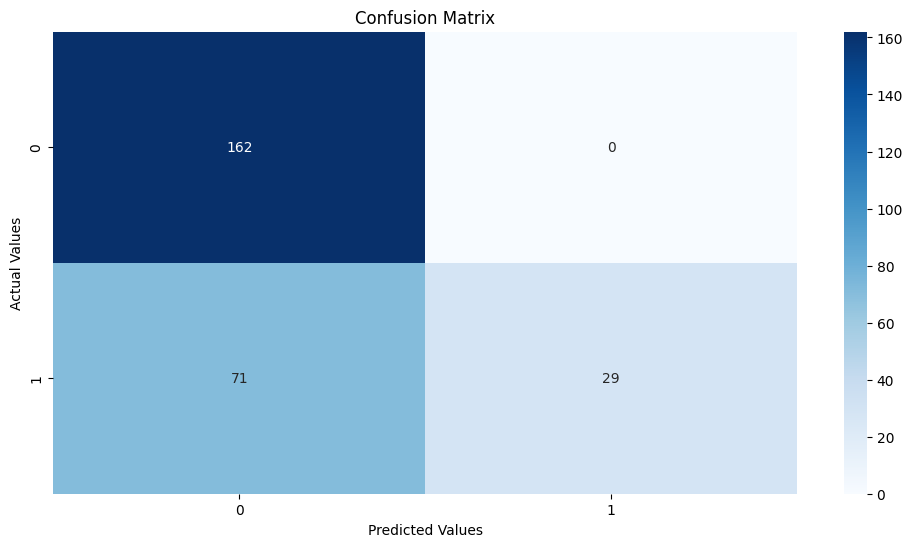

In [134]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       162
           1       1.00      0.29      0.45       100

    accuracy                           0.73       262
   macro avg       0.85      0.65      0.63       262
weighted avg       0.81      0.73      0.68       262



In [136]:
print('train roc-auc: {}'.format(roc_auc_score(y_train, y_pred_train)))


train roc-auc: 0.6563176197836167


In [137]:
print('test roc-auc: {}'.format(roc_auc_score(y_test, y_pred)))

test roc-auc: 0.645
